In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [25]:
boston = load_boston()

In [26]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
x=boston_df.iloc[:,:-1]
y=boston_df.iloc[:,-1]


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 3)

In [29]:
LR=LinearRegression()
LR.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
rr = Ridge(alpha=0.01) #linear and ridge regression resembles
rr.fit(x_train,y_train)
rr100=Ridge(alpha=100) 
rr100.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
print ("linear regression train score:", LR.score(x_train,y_train))
print ("linear regression test score:", LR.score(x_test,y_test))
print ("ridge regression train score low alpha(0.01):", rr.score(x_train,y_train))
print ("ridge regression test score low alpha:", rr.score(x_test,y_test))
print ("ridge regression train score high alpha(100):", rr100.score(x_train,y_train))
print ("ridge regression test score high alpha:", rr100.score(x_test,y_test))

linear regression train score: 0.7280659533306794
linear regression test score: 0.7668895327325096
ridge regression train score low alpha(0.01): 0.7280652903801514
ridge regression test score low alpha: 0.7668140172741875
ridge regression train score high alpha(100): 0.7046318055844062
ridge regression test score high alpha: 0.722061205964923


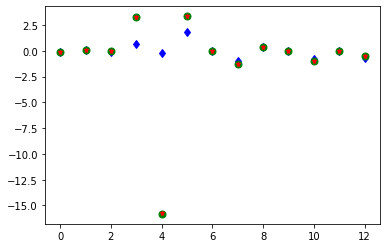

In [36]:
plt.plot(rr.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(LR.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')